# 感知机

## 1.单层感知机

### 统计学习-李航(例2.1)

![x](2.jpg)

In [364]:
def percept(data,eta):
    '''统计学习-李航p30页例2.1'''
    x = data[:,:2]
    y = data[:,data.shape[1]-1]
    w = np.array([0,0]) #选取初值
    b = 0    #选取初值
    length = len(y)
    i = 0  
    while i < length:
        if  y[i] * (np.dot(x[i,],w) + b) <= 0:  #np.dot两者的内积
          ## update w and b
            w = w + eta * y[i] * x[i,]
            b = b + eta * y[i]
            i = 0  #for traversing every point
        else:
            i = i + 1 
    return  w,b

In [365]:
data = np.array([[3,3,1],[4,3,1],[1,1,-1]])
print(data)

[[ 3  3  1]
 [ 4  3  1]
 [ 1  1 -1]]


In [366]:
percept(data =data,eta=1)

(array([1, 1]), -3)

分离超平面：$x^{(1)}+x^{(2)}-3=0$

<center class="half">
<td><img src=6.jpg width =400cm></td>

In [367]:
data1 = np.array([[3,3,1],[4,3,1],[1,1,-1],[1,2,-1]])
print(data1)

[[ 3  3  1]
 [ 4  3  1]
 [ 1  1 -1]
 [ 1  2 -1]]


In [368]:
percept(data=data1,eta=1)

(array([ 4, -1]), -8)

分离超平面：$4x^{(1)}-x^{(2)}-8=0$

### 最简单的人工神经元模型

<center class="half">
<td><img src=7.jpg width =100cm></td>

![x](1.jpg)

感知器接收样本$x$，并将它们与权重$w$结合起来计算净输入。然后将净输入传递给激活函数(这里是单位阶跃函数)，该函数生成二进制输出-1或+1。在学习阶段，该输出用于计算预测的误差并更新权值。

与统计学习-李航(例2.1)有所不同的是
$$w_{j}:=w_{j}+\Delta w_{j}$$
$$\Delta w_{j}=\eta\left(y^{(i)}-\hat{y}^{(i)}\right) x_{j}^{(i)}$$


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[Python3 面向对象编程](https://www.runoob.com/python3/python3-class.html)

In [42]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta  #学习率（0~1）
        self.n_iter = n_iter #迭代次数
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])#初始化权重（m+1维度）
        self.errors_ = [] #列表，每次迭代的错误分类数量
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #wT*x .
    def predict(self, X):  #预测
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### 在Iris数据集上训练感知器模型

In [370]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [371]:
y = df.iloc[0:100, 4] #iloc列切片，loc行切片，ix自动切片
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [372]:
X = df.iloc[0:100, [0, 2]].values
#print(X)

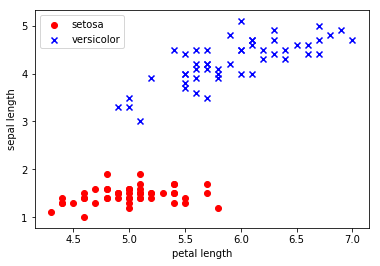

In [373]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

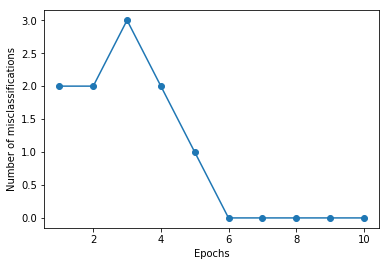

In [374]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [348]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


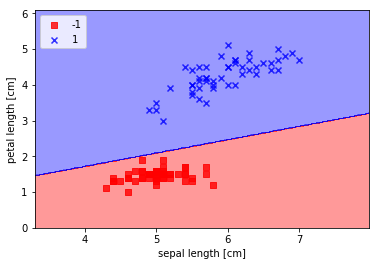

In [350]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# 2.神经网络(深度学习)

本章主要将多层感知器用于**分类**和**回归**，这些方法可以作为更复杂的深度学习方法的起点。多层感知器(MLPs)也被称为**前馈神经网络**，有时也称为神经网络。

[目前所有的ANN神经网络算法大全](https://blog.csdn.net/weixin_33872660/article/details/93849708?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import graphviz

## 多层感知器

这个模型有更多的系数(也称为权重)需要学习:在每个输入和每个隐藏单元(组成隐藏层)之间有一个系数，在隐藏层的每个单元和输出之间有一个系数。

<center class="half">
<td><img src=4.jpg width =300cm></td>

在计算每个隐藏单元的加权和后，将一个[激活函数](https://zhuanlan.zhihu.com/p/25110450)应用于结果——通常是**整流非线性(relu)**或**切线双曲线(tanh)**。然后使用这个函数的结果计算输出的加权和ŷ。

$$h[0]=\tanh (w[0,0] * x[0]+w[1,0] * x[1]+w[2,0] * x[2]+w[3,0] * x[3])$$

$$\hat{y}=v[0]^{*} h[0]+v[1]^{*} h[1]+v[2] * h[2]$$

Text(0, 0.5, 'relu(x), tanh(x)')

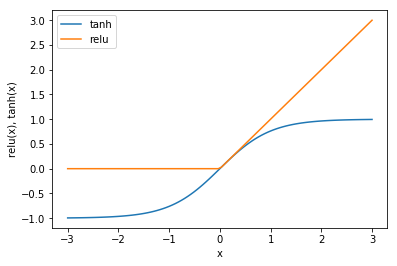

In [191]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

用户需要设置的一个重要参数是**隐藏层中的节点数**。对于非常小或简单的数据集，这个值可以小到10，对于非常复杂的数据集，这个值可以大到10000。也可以添加额外的隐藏层。

## 优化神经网络

[scikit-learn
Machine Learning in Python](https://scikit-learn.org/stable/index.html)

In [382]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [383]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)#产生数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

In [384]:
#print(X)
#print(y)

In [385]:
mlp = MLPClassifier(random_state=0,solver='lbfgs',activation='tanh',hidden_layer_sizes=(100,)).fit(X_train, y_train)

In [386]:
MLPClassifier?

默认100个隐藏层单元，我们可以减少隐藏层单元，对于较小数据集仍然会有很好的效果。

Text(0, 0.5, 'Feature 1')

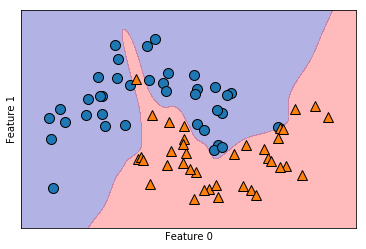

In [389]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

由于只有一个隐含层，这意味着决策函数将由10个直线段组成。如果我们想要一个更平滑的决策边界，我们可以添加更多的隐藏单位。

最后，我们还可以控制一个神经网络的复杂性，方法是使用L2范数惩罚来将权值缩小到零，就像我们在岭回归和线性分类器中所做的那样。MLPCLassifier中的这个参数是alpha(与线性回归模型中的一样)，并且它默认设置为一个非常低的值(很少的正则化)。

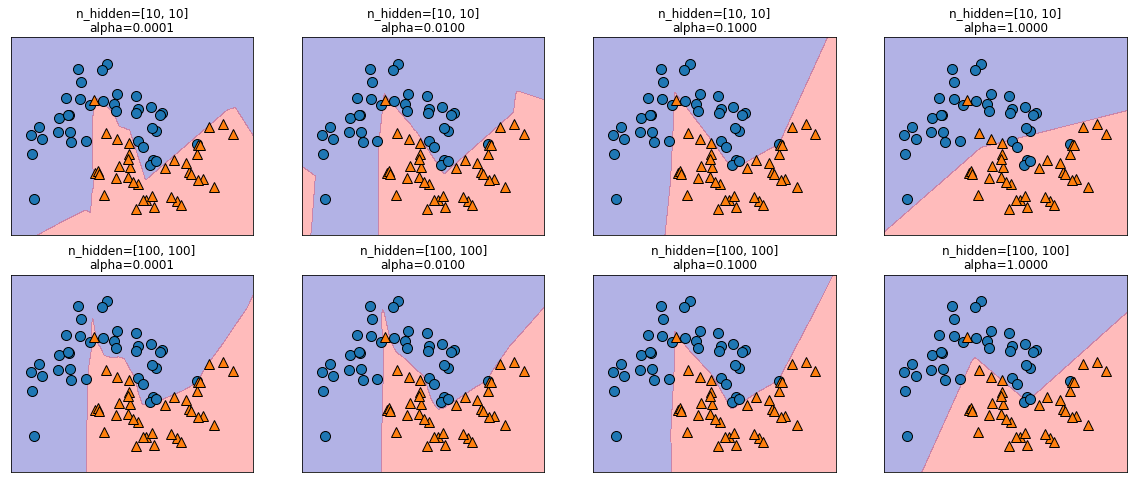

In [243]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,max_iter = 5000,hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

**控制神经网络的复杂性**:

1.隐藏层的数量

2.每个隐藏层的单位数量

3.正则化(alpha)

## 神经网络在真实数据中的作用

应用乳腺癌数据集

In [361]:
cancer.data.shape

(569, 30)

In [362]:
#print(cancer.DESCR)

In [363]:
#cancer.target

In [278]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0) #划分为训练集和测试集
mlp = MLPClassifier(random_state=42) #其他的都用默认参数
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


MLP模型效果还是不错的，训练集的精确度有94%，测试集的精确度有92%。
但是和其他模型比较起来还不是很好，我们先对数据进行标准化。

In [280]:
# 计算训练集上每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算训练集上每个特征的标准差
std_on_train = X_train.std(axis=0) #按列求，30列
#标准化
X_train_scaled = (X_train - mean_on_train) / std_on_train 
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [281]:
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


精确度很好了，接近100%。
- 增加迭代次数只会提高训练集的性能，而不会提高泛化性能。

由于训练和测试性能之间存在一定的差距，我们可以尝试**降低模型的复杂度**以获得更好的泛化性能


In [282]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


观察各个隐藏层的权重，浅色代表较大的正值，深色代表负值。

权重越接近于0，表明该指标对结果影响较小。

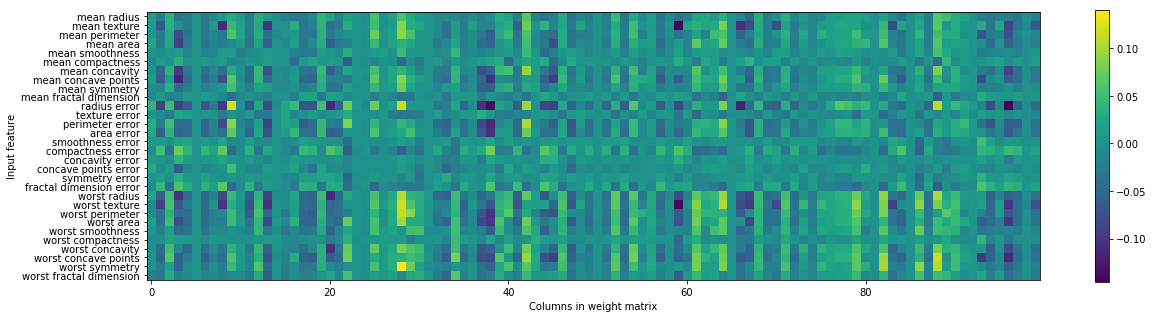

In [283]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

虽然MLPClassifier和MLPRegressor为最常见的神经网络体系结构提供了易于使用的接口，但是它们只捕获了神经网络可能实现的功能的一小部分。

**深度学习库**

- keras

- lasagna

- tensor-flow


# 优点，缺点

**优势**: 

- 能够捕获包含在大量数据中的信息并构建极其复杂的模型。

- 只要有足够的计算时间、数据和对参数的仔细调整，神经网络就能战胜其他机器学习算法(用于分类和回归任务)。

**劣势**：

- 大型神经网络需要很长时间来训练。

- 需要对数据进行仔细的预处理。

- 调整神经网络参数本身也是一门艺术。

>首先创建一个足够大的网络来进行过度拟合，以确保网络能够真正地学习任务。
>一旦你知道训练数据是可以学习的，要么缩小网络，要么增加alpha值来增加正则化，这将提高泛化性能。


<center class="half">
<td><img src=5.jpg width =600cm></td>